In [31]:
# Data->MinMaxScaler -> modal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 



In [32]:
df= pd.read_csv('dulieuxettuyendaihoc.csv', header=0,delimiter=',', encoding ='utf-8')
df


,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [33]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)

In [34]:
df = df[['T1','T2','T3','T4','T5','T6','GT','LOGIC']]
df

,T1,T2,T3,T4,T5,T6,GT,LOGIC
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50
...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,F,1.50
96,3.7,4.1,3.1,3.4,5.5,5.7,F,3.75
97,8.8,9.5,9.5,8.5,9.0,8.5,M,8.00
98,2.7,2.8,6.2,5.2,4.1,4.3,M,3.50


In [35]:
df.describe()

,T1,T2,T3,T4,T5,T6,LOGIC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,4.255000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.060053
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.500000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,3.500000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,4.125000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,8.000000


In [36]:
GT=pd.get_dummies(df['GT']).astype(int)
GT

,F,M
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
95,1,0
96,1,0
97,0,1
98,0,1


In [37]:
df=pd.concat([df,GT],axis=1)
df.head(5)


,T1,T2,T3,T4,T5,T6,GT,LOGIC,F,M
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50,0,1


In [38]:
df.drop('GT',axis=1,inplace=True)
df

,T1,T2,T3,T4,T5,T6,LOGIC,F,M
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,4.00,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,6.75,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,4.50,0,1
...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,1.50,1,0
96,3.7,4.1,3.1,3.4,5.5,5.7,3.75,1,0
97,8.8,9.5,9.5,8.5,9.0,8.5,8.00,0,1
98,2.7,2.8,6.2,5.2,4.1,4.3,3.50,0,1


In [39]:
x=df[['T1','T2','T3','T4','T5','T6','F','M']].values # input frature dac Trung
y=df['LOGIC'].values # output muc tieu (Target)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=16)


In [41]:
# import math 
# def silu(x):
#     return x*x;
# 4 	Tiến hành transform theo hàm x*x dữ liệu input đầu vào trên tập train

x_train = np.square(x_train)

In [42]:
print(x_train.shape)

(80, 8)


In [43]:
# Dòng đầu tiên trên dử liệu đầu vào trên tập dữ liệu train0
x_train[0]

array([13.69, 16.81,  9.61, 11.56, 30.25, 32.49,  1.  ,  0.  ])

In [44]:
df_Xtrain = pd.DataFrame(x_train)

In [45]:
df_Xtrain

,0,1,2,3,4,5,6,7
0,13.69,16.81,9.61,11.56,30.25,32.49,1.0,0.0
1,86.49,92.16,50.41,72.25,72.25,60.84,0.0,1.0
2,65.61,77.44,84.64,77.44,79.21,72.25,0.0,1.0
3,24.01,37.21,6.25,38.44,24.01,42.25,0.0,1.0
4,21.16,51.84,57.76,38.44,64.00,51.84,0.0,1.0
...,...,...,...,...,...,...,...,...
75,6.76,14.44,34.81,46.24,39.69,64.00,0.0,1.0
76,53.29,65.61,67.24,62.41,70.56,65.61,0.0,1.0
77,9.00,12.25,14.44,30.25,25.00,26.01,0.0,1.0
78,36.00,38.44,26.01,26.01,12.25,31.36,0.0,1.0


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>]],
      dtype=object)

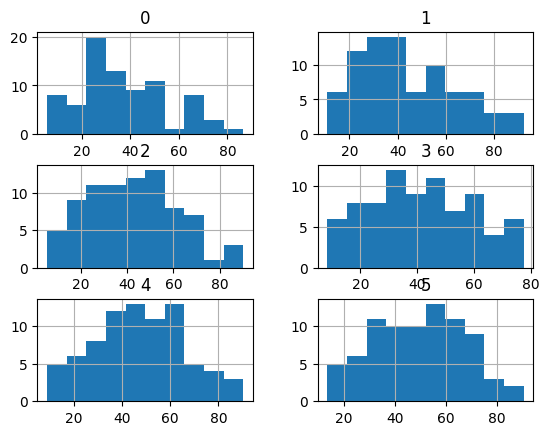

In [46]:
df_Xtrain.iloc[:,0:6].hist()


In [47]:
df_Xtrain.describe()

,0,1,2,3,4,5,6,7
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,37.531375,43.381125,42.631625,40.754125,47.286500,49.765125,0.487500,0.512500
std,18.715092,20.056441,19.702923,17.847846,19.319961,17.933310,0.502997,0.502997
min,5.760000,10.890000,5.290000,8.410000,9.000000,13.690000,0.000000,0.000000
25%,25.757500,28.090000,26.782500,28.090000,33.640000,34.810000,0.000000,0.000000
50%,33.640000,39.690000,42.250000,39.065000,46.240000,51.125000,0.000000,1.000000
75%,51.840000,56.627500,56.250000,53.657500,60.840000,64.000000,1.000000,1.000000
max,86.490000,92.160000,90.250000,77.440000,90.250000,90.250000,1.000000,1.000000


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Scale cho input
sc= MinMaxScaler()
x_train_MinMax = sc.fit_transform(x_train)

In [50]:
df_x_train_MinMax = pd.DataFrame(x_train_MinMax)
df_x_train_MinMax

,0,1,2,3,4,5,6,7
0,0.098229,0.072844,0.050847,0.045632,0.261538,0.245559,1.0,0.0
1,1.000000,1.000000,0.531073,0.924815,0.778462,0.615857,0.0,1.0
2,0.741360,0.818875,0.933969,1.000000,0.864123,0.764890,0.0,1.0
3,0.226062,0.323859,0.011299,0.435028,0.184738,0.373041,0.0,1.0
4,0.190759,0.503876,0.617585,0.435028,0.676923,0.498302,0.0,1.0
...,...,...,...,...,...,...,...,...
75,0.012387,0.043682,0.347458,0.548023,0.377723,0.657132,0.0,1.0
76,0.588753,0.673311,0.729167,0.782269,0.757662,0.678161,0.0,1.0
77,0.040134,0.016734,0.107698,0.316384,0.196923,0.160920,0.0,1.0
78,0.374582,0.338993,0.243879,0.254962,0.040000,0.230799,0.0,1.0


<Axes: >

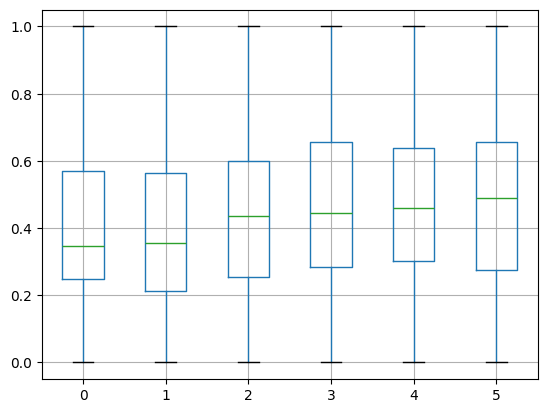

In [51]:

df_x_train_MinMax.iloc[:,0:6].boxplot()


In [52]:
Poly= PolynomialFeatures(degree=2)
x_train_MinMax = Poly.fit_transform(x_train_MinMax)
x_train_MinMax

array([[1.        , 0.09822866, 0.07284361, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.74136009, 0.81887535, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.04013378, 0.01673434, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.37458194, 0.33899348, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.78198935, 0.69336779, ..., 1.        , 0.        ,
        0.        ]])

In [53]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train_MinMax,y_train)
print(model.intercept_)


87746377424135.44


In [54]:

# (Hệ số tự do của biến độc lập):
print(model.intercept_)

# (Hệ số góc của biến độc lập):
print(model.coef_)

87746377424135.44
[-8.77463774e+13  6.17536181e-01 -2.07405407e+00 -1.54566495e-01
  1.68287229e+00 -8.60146904e+00  8.28759605e+00  9.94875235e-02
 -9.94875235e-02  3.27921638e+00 -7.93544226e+00 -1.22249730e+01
 -6.50475850e+00  2.31408517e+01 -7.16178311e+00 -1.83310436e+00
  2.45064054e+00 -7.06827991e+00  1.56241649e+01  1.10898417e+01
 -9.83361819e+00  7.71775404e+00  2.35173613e-01 -2.30922768e+00
  9.05321794e+00 -1.18710985e+01 -4.13151535e+00 -3.82437600e+00
  1.34422548e+00 -1.49879197e+00 -8.73707637e+00  2.86229622e+01
 -1.04008136e+01  2.86352302e-01  1.39651999e+00 -2.52975641e+00
 -1.51212772e+00 -7.75598117e+00 -8.45487874e-01 -4.54230110e+00
  6.81219124e+00  1.47540481e+00  9.94875235e-02  0.00000000e+00
 -9.94875235e-02]


In [55]:
import numpy as np
from sklearn import metrics
x_test = sc.fit_transform(x_test)
y_test_pred=model.predict(x_test)

print('Score or R-Squared', model.score(x_test,y_test))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_test,y_test_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_test,y_test_pred))

ValueError: X has 8 features, but LinearRegression is expecting 45 features as input.

In [ ]:
y_test_pred

array([4.38075822, 3.63051211, 4.92653388, 3.74608357, 4.91550479,
       4.39478901, 4.78018363, 4.38110658, 4.19320147, 4.40089188,
       4.47528751, 4.94729092, 4.37445348, 4.89556074, 3.86268902,
       4.84784048, 5.22847943, 5.23298713, 4.23687849, 4.56272066])

In [ ]:
import numpy as np
from sklearn import metrics
x_train = sc.fit_transform(x_train)
y_train_pred=model.predict(x_train)

print('Score or R-Squared', model.score(x_train,y_train))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_train,y_train_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared 0.13977249358909039
Mean Absolute Error: 0.7150219369444109
Mean squared Error: 0.9861617891121398
root mean squared Error: 0.9930567904768286
Mean Absolute percentage Error: 0.18337393527574508


In [ ]:
y_train_pred

array([3.91673197, 4.90661893, 4.72448801, 4.61927782, 4.43784318,
       4.77766263, 4.33252181, 4.82738569, 3.79517319, 4.36595053,
       4.27264641, 4.64053897, 4.30797939, 4.45782008, 4.33756959,
       4.84223875, 4.73920678, 4.42494135, 4.06510151, 3.64606539,
       3.6864955 , 4.31380535, 4.34375187, 3.96684437, 4.66671329,
       4.84540994, 3.83846701, 4.24469317, 4.21498965, 3.65653431,
       4.50102061, 3.70976804, 4.70114054, 4.56487806, 3.75673225,
       3.45316487, 4.05576282, 4.61029152, 4.40874752, 3.76900054,
       4.9357797 , 4.78584199, 3.61333979, 3.94539303, 4.37616817,
       4.60061873, 4.01552378, 3.87227979, 3.8569892 , 4.38645629,
       3.86622295, 4.03030582, 4.2076787 , 3.64788231, 3.81477537,
       4.76118081, 3.8525097 , 4.17154083, 4.21155993, 4.4886206 ,
       5.06752683, 3.9224497 , 4.75088794, 4.29699358, 4.71420351,
       4.52996828, 3.96685525, 4.76461096, 3.92975164, 5.15254447,
       4.55562583, 3.89951484, 4.1898569 , 4.10738227, 4.80069

Score càng cao càng tốt

In [ ]:
vT1 = 5.0 
vT2 = 6.5 
vT3 = 7.0 
vT4 = 7.0 
vT5 = 6.5
vT6 = 6.0 
vM = 1
vF = 0
scaled = sc.transform([[vT1,vT2,vT3,vT4,vT5,vT6,vM,vF]])

print(f"Giá trị T1 đến T6 sau khi sacle: {scaled}")

predicted_logic = model.predict(scaled)

print(f"Giá trị dự báo điểm logic: {predicted_logic}")

Giá trị T1 đến T6 sau khi sacle: [[-0.0094141  -0.05401747  0.02012712 -0.0204259  -0.03076923 -0.1004441
   1.          0.        ]]
Giá trị dự báo điểm logic: [3.3424637]
